In [1]:
import scrapy
from bs4 import BeautifulSoup
#from wiki_demo.items import WikiDemoItem

import re

class FirstLinkSpider(scrapy.Spider):
    name = 'first_link'
    start_urls = ['https://en.wikipedia.org/wiki/Information_retrieval']
    visited_urls = set()
    
    header_selector = 'h1#firstHeading.firstHeading::text'
    body_link_selector = 'div#mw-content-text.mw-content-ltr a::attr("href")'
    allowed_re = re.compile('https://.+\.wikipedia\.org/wiki/'
                            '(?!((File|Talk|Category|Portal|Special|Wikipedia'
                            '|Help|Draft):|Main_Page)).+')
       
    def parse(self, response):
        try:
#             snippet = BeautifulSoup(response.xpath('//div[@id="mw-content-text"]/p[1]').extract_first(), "lxml").text[:255]+"..."
            title = response.css(self.header_selector).extract_first().encode('utf-8')
            print(title)
            yield {
                'title': title,
                'url': response.url,
                'snippet': snippet
            }
        except:
            pass
        self.visited_urls.add(response.url)
        if response.url == 'https://en.wikipedia.org/wiki/Philosophy':
            raise StopIteration

        for link in response.css(self.body_link_selector).extract():
            if link[0] == '#':
                continue
            next_url = response.urljoin(link)
            if self.allowed_re.match(next_url) and not next_url in self.visited_urls:
                yield scrapy.Request(next_url, callback=self.parse)
                break
        

In [2]:
import scrapy
import scrapy.crawler as crawler
process = crawler.CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)',
})

process.crawl(FirstLinkSpider)
process.start()

2018-04-13 12:51:07 [scrapy.utils.log] INFO: Scrapy 1.5.0 started (bot: scrapybot)
2018-04-13 12:51:07 [scrapy.utils.log] INFO: Versions: lxml 4.1.0.0, libxml2 2.9.4, cssselect 1.0.3, parsel 1.4.0, w3lib 1.19.0, Twisted 17.9.0, Python 3.6.3 |Anaconda custom (64-bit)| (default, Oct 13 2017, 12:02:49) - [GCC 7.2.0], pyOpenSSL 17.2.0 (OpenSSL 1.0.2n  7 Dec 2017), cryptography 2.0.3, Platform Linux-4.13.0-38-generic-x86_64-with-debian-stretch-sid
2018-04-13 12:51:07 [scrapy.crawler] INFO: Overridden settings: {'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}
2018-04-13 12:51:07 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.memusage.MemoryUsage',
 'scrapy.extensions.logstats.LogStats']
2018-04-13 12:51:07 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloadermiddlewares.httpauth.HttpAuthMiddleware',
 'scrapy.downloadermiddlewares.downloadtimeout.

b'Information retrieval'


2018-04-13 12:51:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Information> (referer: https://en.wikipedia.org/wiki/Information_retrieval)
2018-04-13 12:51:08 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Dagbladet_Information> (referer: https://en.wikipedia.org/wiki/Information)


b'Information'


2018-04-13 12:51:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Daily_newspaper> (referer: https://en.wikipedia.org/wiki/Dagbladet_Information)
2018-04-13 12:51:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Journalism> (referer: https://en.wikipedia.org/wiki/Daily_newspaper)


b'Newspaper'


2018-04-13 12:51:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Reportage_(disambiguation)> (referer: https://en.wikipedia.org/wiki/Journalism)


b'Journalism'


2018-04-13 12:51:09 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Reportage> (referer: https://en.wikipedia.org/wiki/Reportage_(disambiguation))


b'Reportage (disambiguation)'
b'Journalism'


2018-04-13 12:51:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/News> (referer: https://en.wikipedia.org/wiki/Reportage)
2018-04-13 12:51:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/News_(disambiguation)> (referer: https://en.wikipedia.org/wiki/News)


b'News'


2018-04-13 12:51:10 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/NEWS_(Austrian_magazine)> (referer: https://en.wikipedia.org/wiki/News_(disambiguation))


b'News (disambiguation)'


2018-04-13 12:51:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/News_magazine> (referer: https://en.wikipedia.org/wiki/NEWS_(Austrian_magazine))


b' (Austrian magazine)'


2018-04-13 12:51:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/News_Magazine_(TV_series)> (referer: https://en.wikipedia.org/wiki/News_magazine)


b'News magazine'


2018-04-13 12:51:11 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/HSV_(TV_station)> (referer: https://en.wikipedia.org/wiki/News_Magazine_(TV_series))


b' (TV series)'
b'HSV (TV station)'


2018-04-13 12:51:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Melbourne> (referer: https://en.wikipedia.org/wiki/HSV_(TV_station))
2018-04-13 12:51:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Melbourne_City_Centre> (referer: https://en.wikipedia.org/wiki/Melbourne)


b'Melbourne'


2018-04-13 12:51:12 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/City_of_Melbourne> (referer: https://en.wikipedia.org/wiki/Melbourne_City_Centre)


b'Melbourne City Centre'
b'City of Melbourne'


2018-04-13 12:51:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Victoria_(Australia)> (referer: https://en.wikipedia.org/wiki/City_of_Melbourne)
2018-04-13 12:51:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Flag_of_Victoria> (referer: https://en.wikipedia.org/wiki/Victoria_(Australia))


b'Victoria (Australia)'


2018-04-13 12:51:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Glossary_of_vexillology> (referer: https://en.wikipedia.org/wiki/Flag_of_Victoria)


b'Flag of Victoria'


2018-04-13 12:51:13 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Nomenclature> (referer: https://en.wikipedia.org/wiki/Glossary_of_vexillology)


b'Glossary of vexillology'


2018-04-13 12:51:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Nomenklatura> (referer: https://en.wikipedia.org/wiki/Nomenclature)


b'Nomenclature'


2018-04-13 12:51:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Russian_language> (referer: https://en.wikipedia.org/wiki/Nomenklatura)


b'Nomenklatura'


2018-04-13 12:51:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Rusyn_language> (referer: https://en.wikipedia.org/wiki/Russian_language)


b'Russian language'


2018-04-13 12:51:14 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Ruthenian_language> (referer: https://en.wikipedia.org/wiki/Rusyn_language)


b'Rusyn language'


2018-04-13 12:51:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Classical_Belarusian> (referer: https://en.wikipedia.org/wiki/Ruthenian_language)


b'Ruthenian language'
b'Tara\xc5\xa1kievica'


2018-04-13 12:51:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Branis%C5%82a%C5%AD_Tara%C5%A1kievi%C4%8D> (referer: https://en.wikipedia.org/wiki/Classical_Belarusian)
2018-04-13 12:51:15 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Ma%C4%8Diuli%C5%A1k%C4%97s> (referer: https://en.wikipedia.org/wiki/Branis%C5%82a%C5%AD_Tara%C5%A1kievi%C4%8D)


b'Branislaw Tarashkyevich'


2018-04-13 12:51:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Geographic_coordinate_system> (referer: https://en.wikipedia.org/wiki/Ma%C4%8Diuli%C5%A1k%C4%97s)


b'Ma\xc4\x8diuli\xc5\xa1k\xc4\x97s'


2018-04-13 12:51:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Coordinate_system> (referer: https://en.wikipedia.org/wiki/Geographic_coordinate_system)


b'Geographic coordinate system'


2018-04-13 12:51:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Coordinate_(disambiguation)> (referer: https://en.wikipedia.org/wiki/Coordinate_system)


b'Coordinate system'


2018-04-13 12:51:16 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Coordinate_space> (referer: https://en.wikipedia.org/wiki/Coordinate_(disambiguation))


b'Coordinate (disambiguation)'


2018-04-13 12:51:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Mathematics> (referer: https://en.wikipedia.org/wiki/Coordinate_space)


b'Coordinate space'


2018-04-13 12:51:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Mathematics_(disambiguation)> (referer: https://en.wikipedia.org/wiki/Mathematics)


b'Mathematics'


2018-04-13 12:51:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Mathematics_(Cherry_Ghost_song)> (referer: https://en.wikipedia.org/wiki/Mathematics_(disambiguation))


b'Mathematics (disambiguation)'


2018-04-13 12:51:17 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Single_(music)> (referer: https://en.wikipedia.org/wiki/Mathematics_(Cherry_Ghost_song))


b'Mathematics (Cherry Ghost song)'


2018-04-13 12:51:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Music> (referer: https://en.wikipedia.org/wiki/Single_(music))


b'Single (music)'


2018-04-13 12:51:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Music_(disambiguation)> (referer: https://en.wikipedia.org/wiki/Music)


b'Music'


2018-04-13 12:51:18 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Musical_notation> (referer: https://en.wikipedia.org/wiki/Music_(disambiguation))


b'Music (disambiguation)'


2018-04-13 12:51:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Musical_isomorphism> (referer: https://en.wikipedia.org/wiki/Musical_notation)


b'Musical notation'


2018-04-13 12:51:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Isomorphism> (referer: https://en.wikipedia.org/wiki/Musical_isomorphism)


b'Musical isomorphism'


2018-04-13 12:51:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Isomorphism_(disambiguation)> (referer: https://en.wikipedia.org/wiki/Isomorphism)


b'Isomorphism'


2018-04-13 12:51:19 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Graph_isomorphism> (referer: https://en.wikipedia.org/wiki/Isomorphism_(disambiguation))


b'Isomorphism (disambiguation)'


2018-04-13 12:51:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Graph_theory> (referer: https://en.wikipedia.org/wiki/Graph_isomorphism)


b'Graph isomorphism'


2018-04-13 12:51:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Graph_of_a_function> (referer: https://en.wikipedia.org/wiki/Graph_theory)


b'Graph theory'


2018-04-13 12:51:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Graph_(discrete_mathematics)> (referer: https://en.wikipedia.org/wiki/Graph_of_a_function)


b'Graph of a function'


2018-04-13 12:51:20 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Graph_(disambiguation)> (referer: https://en.wikipedia.org/wiki/Graph_(discrete_mathematics))


b'Graph (discrete mathematics)'


2018-04-13 12:51:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Graph_(topology)> (referer: https://en.wikipedia.org/wiki/Graph_(disambiguation))


b'Graph'


2018-04-13 12:51:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Topology> (referer: https://en.wikipedia.org/wiki/Graph_(topology))


b'Graph (topology)'


2018-04-13 12:51:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Topography> (referer: https://en.wikipedia.org/wiki/Topology)


b'Topology'


2018-04-13 12:51:21 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Typography> (referer: https://en.wikipedia.org/wiki/Topography)


b'Topography'


2018-04-13 12:51:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Typology_(disambiguation)> (referer: https://en.wikipedia.org/wiki/Typography)


b'Typography'


2018-04-13 12:51:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Typology_(anthropology)> (referer: https://en.wikipedia.org/wiki/Typology_(disambiguation))


b'Typology'


2018-04-13 12:51:22 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Primate> (referer: https://en.wikipedia.org/wiki/Typology_(anthropology))


b'Biological anthropology'


2018-04-13 12:51:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Primate_(disambiguation)> (referer: https://en.wikipedia.org/wiki/Primate)


b'Primate'


2018-04-13 12:51:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Primate_(bishop)> (referer: https://en.wikipedia.org/wiki/Primate_(disambiguation))


b'Primate (disambiguation)'


2018-04-13 12:51:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Primas_(film)> (referer: https://en.wikipedia.org/wiki/Primate_(bishop))


b'Primate (bishop)'


2018-04-13 12:51:23 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Laura_Bari> (referer: https://en.wikipedia.org/wiki/Primas_(film))


b' (film)'
b'Laura Bari'


2018-04-13 12:51:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Argentina> (referer: https://en.wikipedia.org/wiki/Laura_Bari)
2018-04-13 12:51:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Argentina_(disambiguation)> (referer: https://en.wikipedia.org/wiki/Argentina)


b'Argentina'


2018-04-13 12:51:24 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://en.wikipedia.org/wiki/Argentina,_Santiago_del_Estero> (referer: https://en.wikipedia.org/wiki/Argentina_(disambiguation))


b'Argentina (disambiguation)'
b'Argentina, Santiago del Estero'


2018-04-13 12:51:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://es.wikipedia.org/wiki/Argentina_(Santiago_del_Estero)> (referer: https://en.wikipedia.org/wiki/Argentina,_Santiago_del_Estero)


b'Argentina (Santiago del Estero)'


2018-04-13 12:51:25 [scrapy.core.engine] DEBUG: Crawled (200) <GET https://es.wikipedia.org/wiki/Archivo:Flag_of_None.svg> (referer: https://es.wikipedia.org/wiki/Argentina_(Santiago_del_Estero))
2018-04-13 12:51:25 [scrapy.core.engine] INFO: Closing spider (finished)
2018-04-13 12:51:25 [scrapy.statscollectors] INFO: Dumping Scrapy stats:
{'downloader/request_bytes': 25875,
 'downloader/request_count': 62,
 'downloader/request_method_count/GET': 62,
 'downloader/response_bytes': 2092894,
 'downloader/response_count': 62,
 'downloader/response_status_count/200': 62,
 'finish_reason': 'finished',
 'finish_time': datetime.datetime(2018, 4, 13, 9, 51, 25, 720291),
 'log_count/DEBUG': 63,
 'log_count/INFO': 7,
 'memusage/max': 86933504,
 'memusage/startup': 86933504,
 'request_depth_max': 61,
 'response_received_count': 62,
 'scheduler/dequeued': 62,
 'scheduler/dequeued/memory': 62,
 'scheduler/enqueued': 62,
 'scheduler/enqueued/memory': 62,
 'start_time': datetime.datetime(2018, 4, 13, 

b'Archivo:Flag of None.svg'


In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import networkx as nx
g = nx.barabasi_albert_graph(100, 2)
pr = nx.pagerank_numpy(g, alpha=0.85)

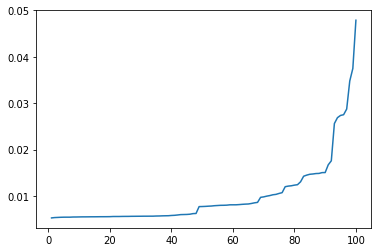

In [4]:
vals = np.sort([el[1] for el in pr.items()])
X = [i+1.0 for i in range(len(vals))]

plt.plot(X, vals*1.0)

In [5]:
max(pr.values()), min(pr.values())

(0.04789106249717651, 0.005315319260504727)